In [1]:
# %pip install torch==2.6.0 torchvision==0.21.0

In [2]:
from glob import glob
import random
import os

from PIL import Image
from torchvision.models import mobilenet_v3_small, MobileNet_V3_Small_Weights

In [3]:
pretrained_weights = MobileNet_V3_Small_Weights.IMAGENET1K_V1

In [4]:
model = mobilenet_v3_small(weights=pretrained_weights)
model.eval()
model

MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): SqueezeExcitation(
          (avgpool): AdaptiveAvgPool2d(output_size=1)
          (fc1): Conv2d(16, 8, kernel_size=(1, 1), stride=(1, 1))
          (fc2): Conv2d(8, 16, kernel_size=(1, 1), stride=(1, 1))
          (activation): ReLU()
          (scale_activation): Hardsigmoid()
        )
        (2): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), 

In [5]:
image_paths = glob('dog_cat_dataset/train/**/cat*') + glob('dog_cat_dataset/train/**/dog*')
len(image_paths), image_paths[:3]

(25000,
 ['dog_cat_dataset/train/cat_2/cat.5077.jpg',
  'dog_cat_dataset/train/cat_2/cat.7660.jpg',
  'dog_cat_dataset/train/cat_2/cat.8553.jpg'])

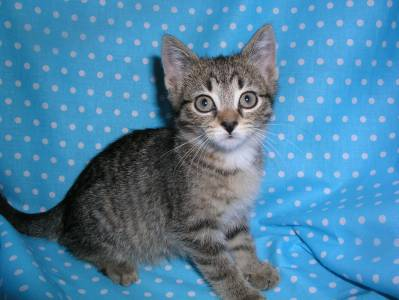

In [6]:
image = Image.open(image_paths[0])
image

In [7]:
# Initialize the Weight Transforms
preprocess = pretrained_weights.transforms()

# Apply it to the input image
image_transformed = preprocess(image)

In [8]:
image_transformed.shape, image_transformed

(torch.Size([3, 224, 224]),
 tensor([[[-1.2617, -1.1760, -0.8849,  ..., -0.9192, -0.8678, -0.8164],
          [-1.2445, -1.1589, -0.9877,  ..., -0.9534, -0.9192, -0.8849],
          [-1.1932, -1.1760, -1.0562,  ..., -1.0048, -0.9534, -0.9192],
          ...,
          [-1.4500, -1.2959, -1.0048,  ..., -1.1932, -1.1760, -1.1247],
          [-1.3987, -1.3644, -1.2274,  ..., -1.1418, -1.1247, -1.1247],
          [-1.4500, -1.4500, -1.3815,  ..., -1.1247, -1.0904, -1.0562]],
 
         [[ 0.4328,  0.3978,  0.4153,  ...,  0.7829,  0.7829,  0.7479],
          [ 0.4153,  0.3803,  0.3627,  ...,  0.8004,  0.7829,  0.7479],
          [ 0.4153,  0.3627,  0.3102,  ...,  0.8004,  0.8004,  0.7479],
          ...,
          [ 0.0301,  0.0651,  0.1877,  ...,  0.6254,  0.6254,  0.6604],
          [ 0.0301, -0.0049,  0.0301,  ...,  0.6429,  0.6604,  0.6429],
          [-0.0224, -0.0399, -0.0224,  ...,  0.6254,  0.6254,  0.6254]],
 
         [[ 1.2282,  1.1411,  1.1411,  ...,  2.0125,  2.0474,  2.0125],


In [9]:
us_image_transformed = image_transformed.unsqueeze(0)
us_image_transformed.shape

torch.Size([1, 3, 224, 224])

In [10]:
output = model(us_image_transformed)
output.shape

torch.Size([1, 1000])

In [11]:
# Dataloader

In [12]:
output_list, label_list, path_list = [], [], []
random.shuffle(image_paths)
for idx, path in enumerate(image_paths):
    label_list.append(path.split('/')[-2])
    path_list.append(path)
    image = Image.open(path)
    image_transformed = preprocess(image)
    output = model(image_transformed.unsqueeze(0))
    output_list.append(output.detach().numpy()[0])

    if idx == 200:
        break

In [13]:
# label_list

In [14]:
output_list[1]

array([-4.8229327e+00, -4.1458735e+00, -5.3259048e+00, -5.5135965e+00,
       -4.8156247e+00, -2.5851412e+00, -4.0818944e+00, -2.5742846e+00,
       -9.2066312e-01, -4.0102134e+00, -2.4504747e+00, -2.5070124e+00,
       -7.2767854e+00, -5.2267532e+00, -5.5505462e+00, -5.7821231e+00,
       -2.8474276e+00, -1.7345387e+00, -1.3008291e+00, -4.4846174e-01,
       -3.4270284e+00, -1.6021806e+00, -6.5934258e+00,  2.8187125e+00,
       -3.3912132e+00, -2.4327958e+00, -6.1041594e+00, -6.9210577e+00,
       -5.0673132e+00, -4.1739368e-01, -4.7596931e+00, -5.2659078e+00,
       -1.3917462e+00, -3.8175907e+00, -4.7718430e+00, -3.5752716e+00,
       -1.1720467e+00, -2.4660273e+00, -1.5718887e+00, -7.7991428e+00,
       -4.7869272e+00, -4.4699335e+00, -6.8270359e+00, -4.7788172e+00,
       -4.2633190e+00, -5.8107543e-01, -6.1365557e+00, -2.3943608e+00,
       -6.2540369e+00, -5.1536536e+00, -6.6978831e+00, -5.7895380e-01,
       -2.0308185e+00, -2.3800933e+00, -3.7768872e+00, -3.2484477e+00,
      

In [15]:
from sklearn.cluster import DBSCAN, KMeans

In [16]:
kmeans_model = KMeans(2)
kmeans_model

KMeans(n_clusters=2)

In [17]:
kmeans_model.fit(output_list)

KMeans(n_clusters=2)

In [18]:
kmeans_model.labels_

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1], dtype=int32)

In [19]:
# dbscan_model = DBSCAN(eps=80, min_samples=2)
# dbscan_model

In [20]:
# dbscan_model.fit(output_list)

In [21]:
# dbscan_model.labels_

In [22]:
new_data = output_list[15]
new_data

array([ -5.0613914 ,  -5.4544964 ,  -6.3061786 ,  -6.271624  ,
        -1.6839597 ,  -4.630466  ,  -5.9554057 ,  -6.6279845 ,
        -9.439995  ,  -6.2572627 ,  -9.257851  ,  -8.8825245 ,
       -10.010398  , -10.198953  , -12.743162  , -11.138777  ,
        -8.8331995 ,  -9.480205  ,  -9.921514  , -11.281239  ,
       -10.530749  ,  -7.3297105 ,  -8.905096  ,  -6.4560313 ,
        -8.222792  ,  -5.69483   ,  -3.7567048 ,  -5.3075123 ,
       -10.91873   ,  -5.6385117 ,  -9.867452  , -10.8305025 ,
        -6.755693  ,  -5.1626244 ,  -6.677249  ,  -9.209842  ,
        -7.8172617 ,  -8.080985  ,  -4.889117  , -13.418743  ,
       -10.452683  ,  -9.887411  , -10.717101  , -10.906725  ,
        -8.312697  , -10.254163  , -11.218302  ,  -8.962201  ,
       -12.164875  ,  -9.237539  , -10.541493  ,  -8.053361  ,
        -7.697751  ,  -6.3825865 ,  -7.1449146 , -11.844336  ,
        -6.304393  ,  -8.512291  ,  -5.715777  ,  -9.718027  ,
        -4.5522184 ,  -5.571317  ,  -3.3419514 ,  -5.96

In [23]:
kmeans_model.predict([new_data])

array([0], dtype=int32)

In [24]:
path_dict = {k: [] for k in set(kmeans_model.labels_)}
for path, pred in zip(path_list, kmeans_model.labels_):
    os.makedirs(f'./results/{pred}', exist_ok=True)
    os.system(f'cp {path} ./results/{pred}')
    path_dict[pred].append(path)

In [25]:
path_dict[1]

['dog_cat_dataset/train/cat_2/cat.7657.jpg',
 'dog_cat_dataset/train/cat_1/cat.1244.jpg',
 'dog_cat_dataset/train/cat_2/cat.9674.jpg',
 'dog_cat_dataset/train/cat_2/cat.7463.jpg',
 'dog_cat_dataset/train/cat_2/cat.9375.jpg',
 'dog_cat_dataset/train/cat_2/cat.9179.jpg',
 'dog_cat_dataset/train/cat_2/cat.6149.jpg',
 'dog_cat_dataset/train/cat_1/cat.420.jpg',
 'dog_cat_dataset/train/cat_2/cat.9048.jpg',
 'dog_cat_dataset/train/cat_1/cat.3469.jpg',
 'dog_cat_dataset/train/cat_1/cat.583.jpg',
 'dog_cat_dataset/train/cat_2/cat.8392.jpg',
 'dog_cat_dataset/train/cat_1/cat.4101.jpg',
 'dog_cat_dataset/train/cat_2/cat.8829.jpg',
 'dog_cat_dataset/train/cat_1/cat.3703.jpg',
 'dog_cat_dataset/train/cat_2/cat.5253.jpg',
 'dog_cat_dataset/train/cat_2/cat.9276.jpg',
 'dog_cat_dataset/train/cat_1/cat.4227.jpg',
 'dog_cat_dataset/train/cat_2/cat.9908.jpg',
 'dog_cat_dataset/train/cat_2/cat.8760.jpg',
 'dog_cat_dataset/train/cat_2/cat.5775.jpg',
 'dog_cat_dataset/train/cat_1/cat.1199.jpg',
 'dog_cat_da

In [26]:
path_dict[0]

['dog_cat_dataset/train/cat_2/cat.6004.jpg',
 'dog_cat_dataset/train/dog_2/dog.7889.jpg',
 'dog_cat_dataset/train/cat_2/cat.5082.jpg',
 'dog_cat_dataset/train/dog_1/dog.681.jpg',
 'dog_cat_dataset/train/dog_2/dog.5164.jpg',
 'dog_cat_dataset/train/dog_3/dog.10098.jpg',
 'dog_cat_dataset/train/dog_1/dog.1692.jpg',
 'dog_cat_dataset/train/cat_1/cat.2154.jpg',
 'dog_cat_dataset/train/dog_1/dog.4050.jpg',
 'dog_cat_dataset/train/dog_2/dog.6846.jpg',
 'dog_cat_dataset/train/dog_2/dog.8446.jpg',
 'dog_cat_dataset/train/dog_2/dog.8959.jpg',
 'dog_cat_dataset/train/dog_1/dog.837.jpg',
 'dog_cat_dataset/train/cat_2/cat.6086.jpg',
 'dog_cat_dataset/train/dog_1/dog.1883.jpg',
 'dog_cat_dataset/train/dog_1/dog.4006.jpg',
 'dog_cat_dataset/train/dog_1/dog.3998.jpg',
 'dog_cat_dataset/train/dog_2/dog.8118.jpg',
 'dog_cat_dataset/train/dog_2/dog.8218.jpg',
 'dog_cat_dataset/train/dog_1/dog.1142.jpg',
 'dog_cat_dataset/train/cat_1/cat.3351.jpg',
 'dog_cat_dataset/train/cat_1/cat.2608.jpg',
 'dog_cat_d